# Ensemble Methods Notebook
Welcome to the weekly project on Ensemble Methods. You will be working with a dataset of traffic jams.

## Dataset
The dataset that will be used in this task is `Traffic_Jam.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
This dataset contains traffic data including various counts of vehicle types across different times and days. Below are samples of these columns:

* `Time`: The timestamp of the traffic count (in intervals).
* `Date`: The day of the month the data was recorded.
* `Day of the Week`: The day of the week for the recorded data.
* `CarCount`: The number of cars counted during the time interval.
* `BikeCount`: The number of bikes counted during the time interval.
* `BusCount`: The number of buses counted during the time interval.
* `TruckCount`: The number of trucks counted during the time interval.
* `Total`: Total vehicles counted during the time interval.
* `Traffic Situation`: Qualitative assessment of the traffic (e.g., normal, congested).

## Goal
The primary goal of this exam is to develop a predictive model capable of determining the `Traffic Situation` based on your choice of features provided in the dataset. Students are expected to apply ensemble methods to build and evaluate their models.

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier

# Load the dataset


In [2]:
# Load Dataset
df = pd.read_csv('Datasets/Traffic_Jams.csv')

In [3]:
# Getting information from the dataset, like the data types of columns and memory usage.
# 3 object, 6 integer and the memory usage is 444.8 KB
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               6324 non-null   object
 1   Date               6324 non-null   int64 
 2   Day of the week    6324 non-null   object
 3   CarCount           6324 non-null   int64 
 4   BikeCount          6324 non-null   int64 
 5   BusCount           6324 non-null   int64 
 6   TruckCount         6324 non-null   int64 
 7   Total              6324 non-null   int64 
 8   Traffic Situation  6324 non-null   object
dtypes: int64(6), object(3)
memory usage: 444.8+ KB


# Exploratory Data Analysis (EDA)

Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe()

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `Traffic Situation` to understand the class balance.

3. **Correlation Analysis**: Analyze correlations between features.

In [4]:
# Getting information about the numerical values of the dataset to understand the central tendencies.
# We can have at least an idea about the numerical dataset distribution.
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000
mean,16.043327,64.355629,12.013283,12.557875,18.658128,107.584915
std,8.956907,44.307088,11.363955,12.319831,10.724822,55.850784
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.000000,3.000000,1.000000,10.000000,53.000000
50%,16.000000,61.000000,9.000000,10.000000,18.000000,103.000000
75%,24.000000,101.250000,19.000000,20.000000,27.000000,151.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


In [5]:
# We can see the distribution of the target variable. It has 4 unique values with the highest values being normal and the seoncd would be heavy and the htird would be low and the last is high.
df['Traffic Situation'].value_counts()

Traffic Situation
normal    3858
heavy     1137
low        834
high       495
Name: count, dtype: int64

In [6]:
# Create a copy of the dataframe to use label encoder and standard scaler on the data for displaying the correlation matrix
df_scaled = df.copy()

# Use label encoder in all the catagorical data
le = LabelEncoder()
for i in df_scaled.select_dtypes(include=['object']).columns:
    df_scaled[i] = le.fit_transform(df_scaled[i])

# Use standard scaler to scale the dataset
ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(df_scaled),columns=df_scaled.columns)

# creating the correlation matrix and displaying it
corr_matrix = df_scaled.corr()
display(corr_matrix)

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
Time,1.000000,-0.003101,-0.003315,0.494905,0.295833,0.350467,-0.302568,0.472014,-0.289184
Date,-0.003101,1.000000,-0.118882,-0.010507,-0.001985,-0.006166,0.021137,-0.006041,0.009278
Day of the week,-0.003315,-0.118882,1.000000,0.013478,-0.087412,0.115630,0.022574,0.022747,0.024173
CarCount,0.494905,-0.010507,0.013478,1.000000,0.705941,0.664491,-0.583984,0.971386,-0.686521
BikeCount,0.295833,-0.001985,-0.087412,0.705941,1.000000,0.581289,-0.585670,0.779261,-0.575332
BusCount,0.350467,-0.006166,0.115630,0.664491,0.581289,1.000000,-0.533847,0.763496,-0.614372
TruckCount,-0.302568,0.021137,0.022574,-0.583984,-0.585670,-0.533847,1.000000,-0.508179,0.454704
Total,0.472014,-0.006041,0.022747,0.971386,0.779261,0.763496,-0.508179,1.000000,-0.709894
Traffic Situation,-0.289184,0.009278,0.024173,-0.686521,-0.575332,-0.614372,0.454704,-0.709894,1.000000


# Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.

2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding and lable-encoder.

3. **Feature Scaling**: Standardize or Normalize numerical features if needed to have a consistent scale.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling.

In [7]:
# There are no missing values in the dataframe
df.isna().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [8]:
# There are no duplicated values in the dataframe
df.duplicated().sum()

0

In [9]:
# Encode the catagorical data

# Create a copy of the data to use the data in the visualization later without encoding
df_scaled = df.copy()

# Using label encoder for these catagorical data becuase there are many unique values in each catagroical column which will result in huge number of columns if we used one hot encoding. it could be used ordinal encoding but no need to convert the data in the future back to catagorical that's why no need to use ordinal encoding.
le = LabelEncoder()
for i in df_scaled.select_dtypes(include=['object']).columns:
    df_scaled[i] = le.fit_transform(df_scaled[i])

In [10]:
# Use standard scaler to scale the dataset with the encoded catagorical columns
ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(df_scaled),columns=df_scaled.columns)

In [23]:
# There is no need to delete any columns. There is a chance to delete "Time" column but because it's just one columns it would affect the model performance, and the time spent to train the model.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               6324 non-null   object
 1   Date               6324 non-null   int64 
 2   Day of the week    6324 non-null   object
 3   CarCount           6324 non-null   int64 
 4   BikeCount          6324 non-null   int64 
 5   BusCount           6324 non-null   int64 
 6   TruckCount         6324 non-null   int64 
 7   Total              6324 non-null   int64 
 8   Traffic Situation  6324 non-null   object
dtypes: int64(6), object(3)
memory usage: 444.8+ KB


# Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as the `Traffic Situation`.

2. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

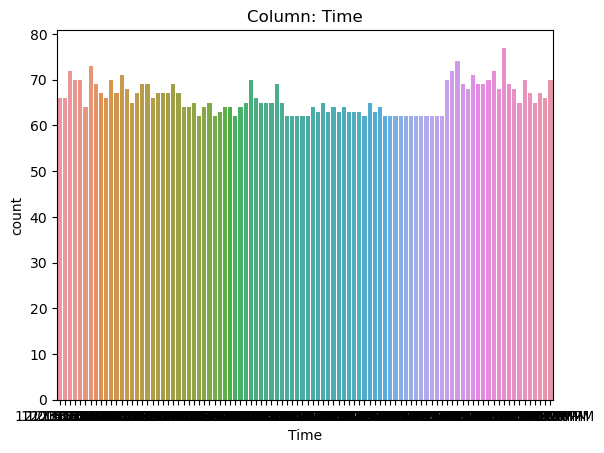

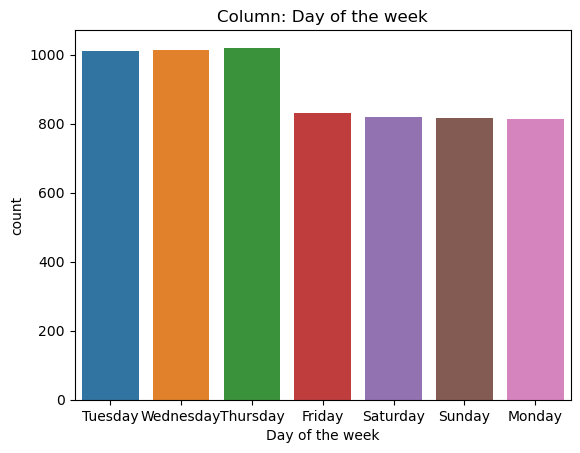

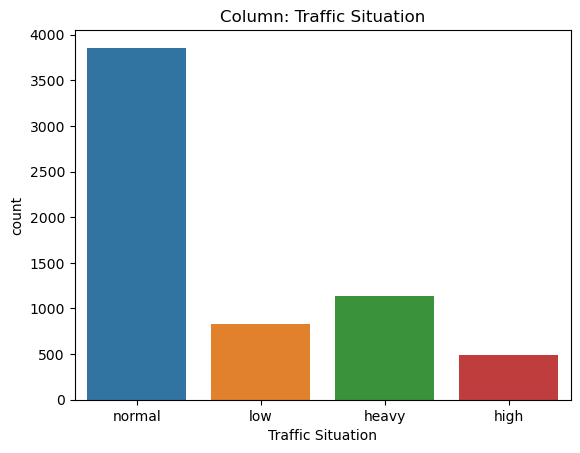

In [11]:
# Creating count plots for all catagoricla columns to see the distribution of its unique values
for i in df.select_dtypes(include=['object']).columns:
    sns.countplot(df, x=i)
    plt.title(f"Column: {i}")
    plt.show()

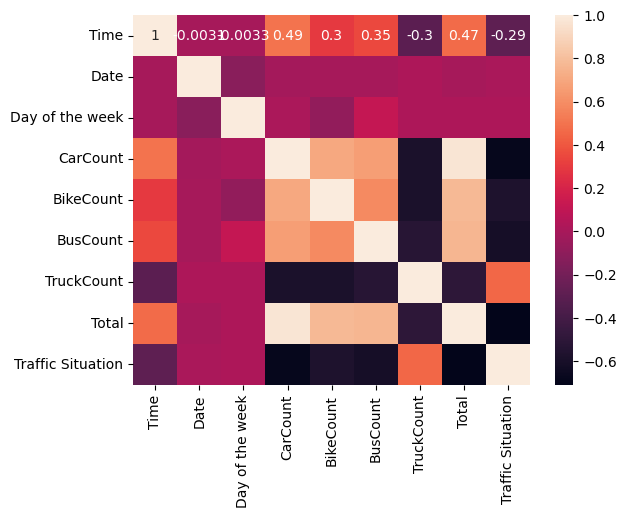

In [12]:
# Creating heatmap from all the data that's why I used df_scaled instead of df

corr_matrix = df_scaled.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

<Axes: >

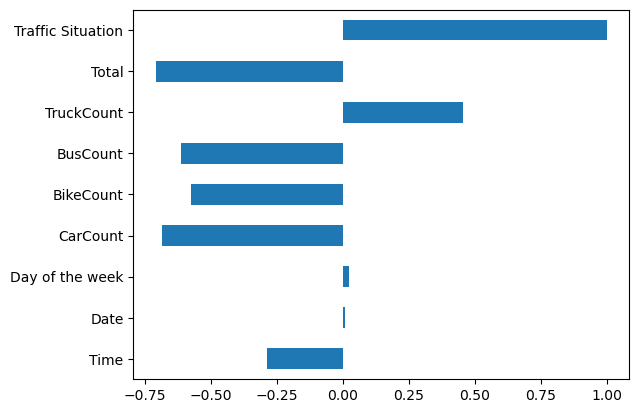

In [13]:
# Getting the relationships of the target variable for insights in the future and knowing which one will be the best to our prediction
corr_matrix['Traffic Situation'].plot.barh()

# Split the Dataset

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data.

In [14]:
# Defining the features and the target variable
X = df_scaled.drop('Traffic Situation', axis=1)

# Picking the target value with just label encoding because standdard scaling will result in error with fitting into the model
y = le.fit_transform(df['Traffic Situation'])


# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Classifiers

## Bagging
Chose the bagging model to go with and initialize and train a the model.

In [15]:
# Bagging Classifier with estimator Random Forest Classifier

bagging_model = BaggingClassifier(estimator=RandomForestClassifier(),random_state=42)
bagging_model.fit(X_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(), random_state=42)

### Evaluate the model performance

In [16]:
# Predicition with displaying the accuracy of teh model

pred_bagging = bagging_model.predict(X_test)

print(f"The accuracy of Bagging Model: {accuracy_score(y_test, pred_bagging)}")

The accuracy of Bagging Model: 0.9035573122529644


## Boosting
Chose the Boosting model to go with and initialize and train a the model.

In [17]:
# XGBoost Classifier

boosting_model = XGBClassifier(random_state=42)
boosting_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

### Evaluate the model performance

In [18]:
# Predicition with displaying the accuracy of the model

pred_boosting = boosting_model.predict(X_test)

print(f"The accuracy of Boosting Model: {accuracy_score(y_test, pred_boosting)}")

The accuracy of Boosting Model: 0.9003952569169961


## Stacking Classifier
Combine the previous classifiers as the base models using a Stacking Classifier.

In [19]:
# Base Estimators of the stacking classifier
base_estimators = [
    ('bagging', bagging_model),
    ('boosting', boosting_model)
]

### Define meta-learner (LogisticRegression)

In [20]:
# Meta Estimators of the stacking classifier

meta_estimator=LogisticRegression()

### Initialize and Train the Stacking Classifier

Stacking combines multiple models (base learners) using a meta-learner. The meta-learner is trained on the predictions of the base learners to make the final prediction.

In [21]:
# Stacking Classifier

stacking_model = StackingClassifier(estimators=base_estimators, final_estimator=meta_estimator)

stacking_model.fit(X_train, y_train)

StackingClassifier(estimators=[('bagging',
                                BaggingClassifier(estimator=RandomForestClassifier(),
                                                  random_state=42)),
                               ('boosting',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None,...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              objective='multi:softprob', ...))],
                   final_estimator=LogisticRegression())

### Evaluate the model performance

In [22]:
# Predicition with displaying the accuracy of the model

pred_stacking = stacking_model.predict(X_test)

print(f"The accuracy of Stacking Model: {accuracy_score(y_test, pred_stacking)}")

The accuracy of Stacking Model: 0.9075098814229249


# Notebook Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting churn, and why do you think they are significant?
   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?

* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?

* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?


# Answer here:

### Feature Selection and Engineering
- as we can see that the most correlated with the traffic situation is "Total" column which is negatively correlated with Traffic situation
- The others like "Bus Count", "Bike Count", and "Car Count" is negatively correlated but with less impact than "Total"
- The "Truck Count" would affect the "Traffic Situation" in positive correlation not like the others.
- The correlation matrix shows all the information about the relationship between the target value and other columns. And you can plot the barh of the "Traffic Situation" correlation matrix and shows the most correlated and least correlated columns with it. (You can see the plot above in the visualization part)
  
- In my opinion is, no need to do feature engineering because after applying the ensemble methods the result is very promising which is around 90% accuracy in the test values and in addition that there are multiple relationships with the target column with different column, so we don't need to include another column. it could improve the result but 90% is more than enough or more than that will reach the overfit situation in the model.

### Model Selection
- The reason why i selected RandomForestClassifier over another columns is for the distribution of the target value and number of unique values in the target value. Becuase it's not a binary target value becuase it has more than 2 options that's why we can't use LogisterRegression, or it's not that we can't more than it would result in worse results. And we cannot use the SVC due to the linearity of the distribtion. For Random forest classifier, it can use the model with different approches and it would mind the linearity or the number of the unique values. Basically the RandomForestClassifier should be used when the others would result in worse result due to using them in their disadvantages
- Using ensemble methods result in many advantages
    - It reduce the overfit percentags from being happen in the model
    - It maximize the variance, to make a better distribution in the end
    - It used for complex data to create a better result from different train sets, and many more.
  
- In the same time we can't talk about the advantages without the disadvantages of ensemble methods
    - Long Computation
    - Take much resources
    - Cannot process simple data, or it will give the worst result in simple dataset
    - Need more data in the dataset or it will reach teh overfit faster than single model beucase of the iterations of training the data in models

- Models Used:
    - Bagging with RandomForestClassifier, the result of the accuracy would be 90.35% which is great
    - Boosting with XGBoostClassifier, the result of the accuracy would be 90.04% which is worst than bagging model
    - Stacking with RandomForestClassifier & XGBoostClassifier as the base models with LogisticRegression as meta model, the result of the accuracy would be 90.75% which is the best model
    - The reason behind that the stacking classifier did better than bagginig and boosting models is that the stacking classifier used their result and improve it with Logistic Regression Model and trying to fit after the result would immedietly give better result

### Model Evaluation
- I used the accuracy of the mode. there are r^2 would be good, too. I used the accuracy becuase it would give me an insights about the prediction value if it would be wrong or right with the percentage, so I can use it later in my insights about the dataset and the model itself.
- There is confusion matrix, but it's hard to implement in this situation becuase there are 4 unique values and the reading out of it would be worse that's why we can't use percision or recall due to the same reason.
- My insights about the models is I can now say that with Stacking classifier model I can be right with percentage of 90.75% in the prediction values that the model would predict.
- The accuracy compare the model prediction percenatage to give the result. that's why with a better percentage you can say that Stacking classifier is better than bagging and boosting that used in this file. in the same time you cannot say that to all the higher accuracy becuase sometimes you reached overfit which result in worse model than the lower percentage.


### Insights about the data
- The data is clean and you can predict easily with encoding and scaling of the data itself.
- The result is very promising to reach to what is the traffic situation would be when an accident happen
- We can see from the visualization the relationships between the columns and specifically the target columns realtionship with the others and we can say that there are some good relationships to affect the target column and result in better prediction.